In [12]:
import pandas as pd
import numpy as np

# Load dataset
df=pd.read_csv('DSBDALExam DataSets/DSBDALExam DataSets/DSBDALExam DataSets/HeartDisease/heart.csv')
# Assign proper column names
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [13]:
print(df['target'].unique())


[0 1]


In [14]:
# Convert 'ca' and 'thal' columns to numeric, coerce errors to NaN (e.g., '?')
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Handle missing values (impute with the median)
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set a clean style
sns.set(style="whitegrid")


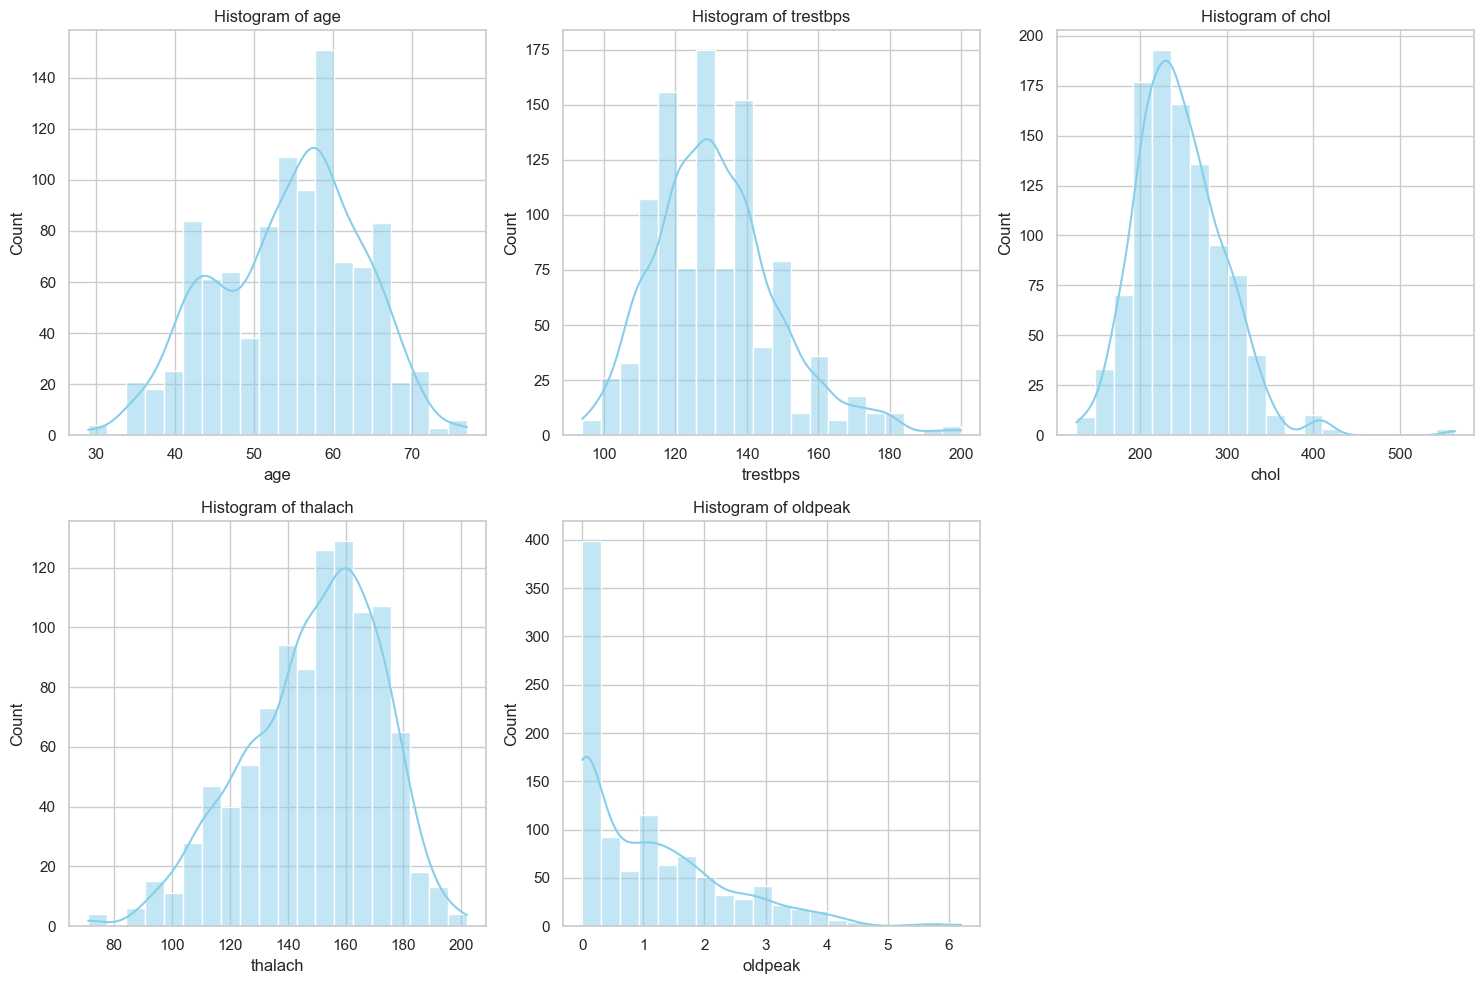

In [16]:
# 🎯 Objective: Visualize distribution and skewness of continuous features
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


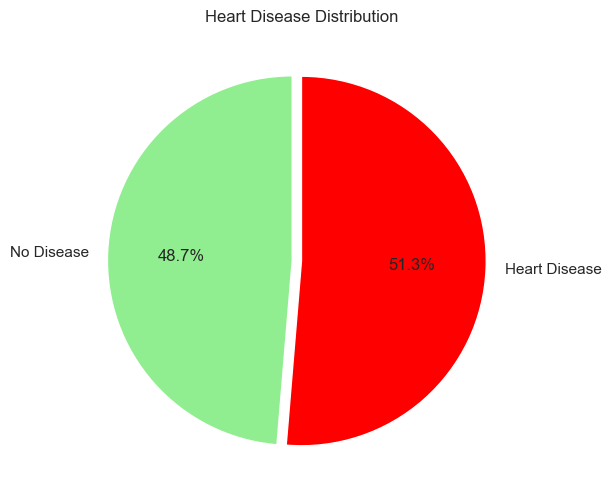

In [21]:
# 🎯 Objective: Show proportion of patients with and without heart disease
labels = ['No Disease', 'Heart Disease']
sizes = df['target'].value_counts().sort_index()
colors = ['lightgreen', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
plt.title('Heart Disease Distribution')
plt.show()


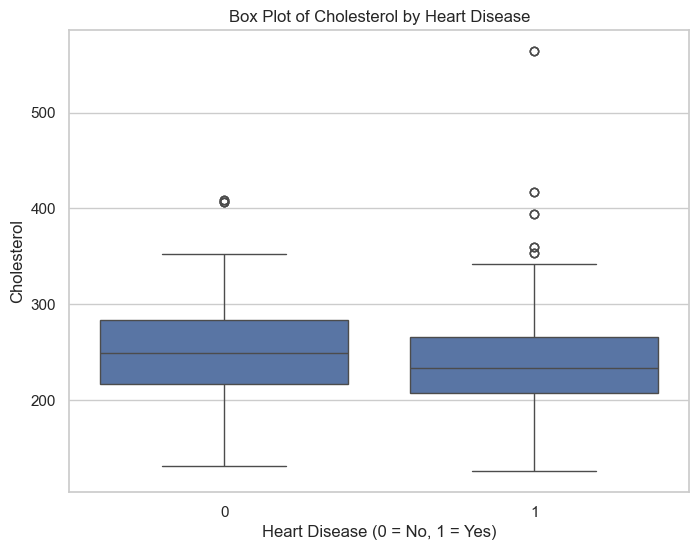

In [18]:
# 🎯 Objective: Compare cholesterol distribution between disease groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Box Plot of Cholesterol by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.show()


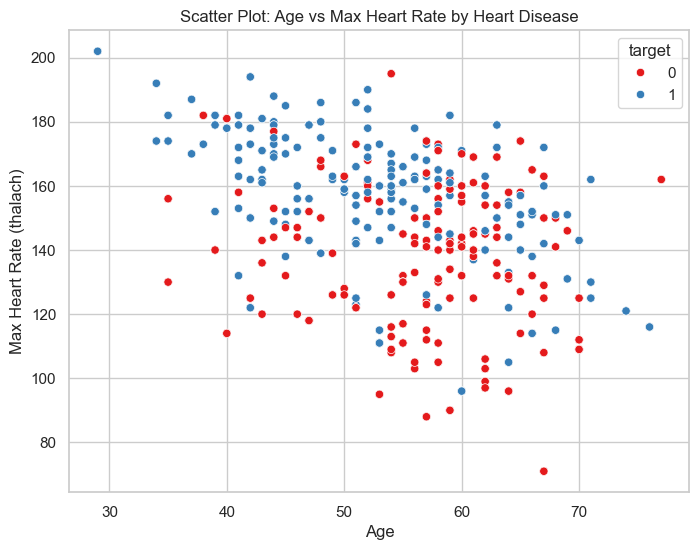

In [19]:
# 🎯 Objective: Explore relationship between age and max heart rate, colored by disease presence
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='Set1')
plt.title('Scatter Plot: Age vs Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


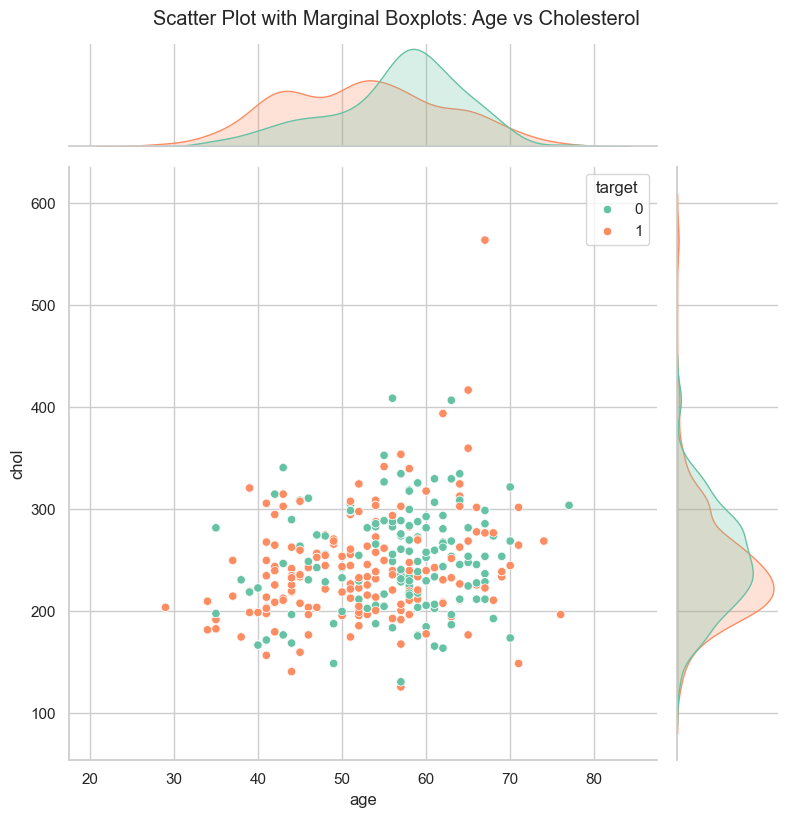

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 Objective: Show relationship between age and cholesterol, and distributions via marginal boxplots
g = sns.jointplot(
    data=df,
    x='age',
    y='chol',
    hue='target',
    kind='scatter',
    marginal_kws=dict(),  # Use box=True for boxplots
    palette='Set2',
    height=8
)

g.fig.suptitle('Scatter Plot with Marginal Boxplots: Age vs Cholesterol', y=1.02)
plt.show()
